In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = np.asarray(pd.read_csv("daticos.csv", header=None))
X = df[:,0:2]

# Clasificación ideal
y = df[:,2]
yb = np.zeros((len(X),1))
yc = np.zeros((len(X),1)) # Complemento de y (y = clasificación correcta)
for i in range (len(X)):
    yb[i] = y[i]
    yc[i] = 1 - yb[i]


In [41]:
# %%
get_ipython().run_line_magic('matplotlib', 'inline')

# Definición preliminar de peso (w1 y w2) y bias (b)

w1,w2 = 0.1 , 0.2
W = np.array([[w1],[w2]])
b = 1
t = np.linspace(-0.1,1.1,100)

# Definición de los vectores para la clase Azul y la clase Rojo
U = np.zeros((len(X),3))
D = np.zeros((len(X),3))
for j in range(len(X)):
    if y[j] == 0:
        U[j,0:2] = X[j,0:2]
        U[j,2] = j
    else:
        D[j,0:2] = X[j,0:2]
        D[j,2] = j


# Se definen las siguientes Funciones de Activación:

#funcion escalón
def step(t):
    if t>=0:
        return 1
    return 0

#función sigmoide
def sigmoid(t):
    p1 = 1 / (1 + np.exp(-t))
    return p1

#función softmax
def softmax(t):
    p1 = np.exp(t) / (np.exp(t) + np.exp(-t))
    pc = 1 - p1
    return p1, pc 

# %%
#funcion para prediccion
def prediccion(X,W,b):
    P = np.zeros((len(X),1))
    f = 10 # factor para agrandar los porcentajes
    for i in range (len(X)):
        P[i] = step(f*((np.matmul(X[i,:],W))+b))   
    return P


In [42]:
# %%
#define prediccion con sigmoide
def prediccion_step(X, y, W, b, learn_rate = 0.01):
    W_test = np.zeros(W.shape)
    W_test = W
    P = prediccion(X,W_test,b)

    for i in range(len(X)):
        if P[i] != y[i]:
            if y[i] == 0:
                W_test[0] -= learn_rate * X[i,0]
                W_test[1] -= learn_rate * X[i,1]
                b -= learn_rate

            elif y[i] == 1:
                W_test[0] += learn_rate * X[i,0]
                W_test[1] += learn_rate * X[i,1]
                b += learn_rate
    
    return W_test, b

In [43]:
# Define número de épocas:
epochs = int(input("Número de épocas"))

for i in range (epochs):
    W, b = prediccion_step(X, y, W, b)
    y1 = -(W[0]/W[1])*t - (b/W[1])
    #plt.plot(t,y1)

In [44]:
# Predicción final:
Pf = prediccion(X,W,b)
pc1 = np.zeros((X.shape[0],1))
pc2 = np.zeros((X.shape[0],1))
score = np.zeros((X.shape[0],1))
PRE = []
PREE = np.zeros((len(X),1))
con = 0 # Contador de aciertos

# Evaluación con Softmax:
for i in range (len(X)):
    score[i] = np.matmul(X[i,:],W)+b
    pc1[i] , pc2[i] = softmax(f*score[i])
    if Pf[i] == y[i]:
        con += 1

# Probabilidad de cada punto:
prob_point = np.concatenate([pc1, pc2], axis=1) 

In [45]:
# Rectas de decisión:
m_f = -(W[0]/W[1])
b_f = -(b/W[1])
d = 0.2 # Distancia entre rectas
# Se crea la matriz "recta" para almacenar 8 rectas paralelas a "y1" y equidistantes entre sí. 
rectas = np.zeros((10,100))
for k in range(0,5):
    rectas[k,:] = m_f*t + b_f + d*(k-5)

for k in range(5,10):
    rectas[k,:] = m_f*t + b_f + d*(k-4)

In [46]:
# Funaicón para graficar las regiones de probabilidad 
def regiones(li,ls,rectas,y1,colors,alfa=0.4):
    regions = [(li, rectas[0,:], 0), (li, rectas[1,:], 1), (li, rectas[2,:], 2), 
                   (li, rectas[3,:], 3), (li, rectas[4,:], 4), (li, y1, 5), (ls, rectas[9,:], 6), 
                   (ls, rectas[8,:], 7), (ls, rectas[7,:], 8), (ls, rectas[6,:], 9), 
                   (ls, rectas[5,:], 10),(ls, y1, 11)]
    for i, region in enumerate(regions):
        plt.fill_between(t, region[0], region[1], color=colors[i], alpha=alfa*(i+1)/10)
    return 

In [47]:
# Función para graficar un punto y sus porcentajes, además grafica las regiones de probabilidad 
def point(j):
    # Definir colores para cada región
    colors = ['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red']
    ls = 2
    li = -2
    
    if U[j,2] == j:
        fig, ax = plt.subplots()
        regiones(li,ls,rectas,y1,colors)
        plt.scatter(U[:,0],U[:,1],color="red",s=50, edgecolor='k')
        plt.scatter(D[:,0],D[:,1],color="blue",s=50, edgecolor='k')
        plt.scatter(U[j,0],U[j,1],c='g', marker='o', s=100)
        plt.annotate("P(A,B) = {}".format(prob_point[j]), (0.69,0.0), textcoords='offset points', xytext=(10,10), ha='center',fontsize=11, fontweight='bold')
        plt.plot(t,y1, c="k",)
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.xlim(-0.07,1.07) 
        plt.ylim(-0.09,1.09)
        plt.show

    elif D[j,2] == j: 
        fig, ax = plt.subplots()
        regiones(li,ls,rectas,y1,colors)
        plt.scatter(U[:,0],U[:,1],color="red",s=50, edgecolor='k')
        plt.scatter(D[:,0],D[:,1],color="blue",s=50, edgecolor='k')
        plt.scatter(D[j,0],D[j,1],c='y', marker='o', s=100)
        plt.annotate("P(A,B) = {}".format(prob_point[j]), (0.25,0.93), textcoords='offset points', xytext=(10,10), ha='center',fontsize=11, fontweight='bold')
        plt.plot(t,y1, c="k",)
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.xlim(-0.07,1.07) 
        plt.ylim(-0.09,1.09)
        plt.show

Con 12 épocas, el porcentaje de acierto es de 94.0 %


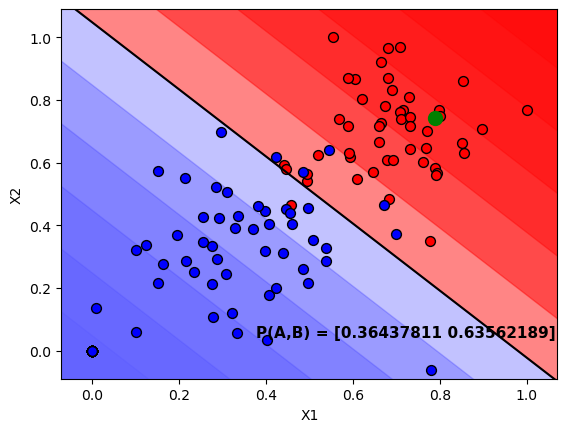

In [48]:
# Porcentaje de acierto
P_acierto = con/len(X)
print("Con",epochs,"épocas, el porcentaje de acierto es de", P_acierto*100,"%")

point(61)

In [49]:
# Maximum Likelihood:
MV = np.zeros((X.shape[0],1))
# Entropía Cruzada:
CE = np.zeros((X.shape[0],1))

for i in range (len(X)):
    MV[i] = yb[i]*prob_point[i,0] + (1-yb[i])*(1-prob_point[i,0])
    CE[i] = yb[i]*np.log(prob_point[i,0]) + (1-yb[i])*np.log(1-prob_point[i,0])

Maximum_Likelihood = np.prod(MV)
print('Maximum Likelihood =',Maximum_Likelihood)

Cross_Entropy = -np.sum(CE)
print('Cross Entropy =',Cross_Entropy)

Maximum Likelihood = 7.51126140429945e-24
Cross Entropy = 53.24563881689644


In [50]:
# Máxima Verosimilitud y función de pérdidas/entropía cruzada

Y = np.concatenate([yb, yc], axis=1).T 

# Logaritmo de las probabilidades de cada punto:
logaritmos = -np.log(prob_point)

# Función Máxima Verosimilitud:
Max_Ver = np.zeros((len(X),1)) 
# Función Entropía Cruzada:
LF = np.zeros((len(X),1))

for i in range(len(X)):
    Max_Ver[i] = np.matmul(prob_point[i,:],Y[:,i])
    LF[i] = np.matmul(logaritmos[i,:],Y[:,i])

print('Maximum Likelihood =',np.prod(Max_Ver))

print('Cross Entropy =',np.sum(LF))

Maximum Likelihood = 7.51126140429945e-24
Cross Entropy = 53.24563881689644


In [51]:
Maxima_Verosimilitud = np.exp(-Cross_Entropy)
Entropia_Cruzada = -np.log(Maximum_Likelihood)

print(Maxima_Verosimilitud)
print(Entropia_Cruzada)

7.511261404299405e-24
53.24563881689643


In [52]:
# Función de Error

error = np.zeros((len(X),1))
for i in range (len(X)):
    error[i] = (1-y[i])*logaritmos[i,1] + y[i]*logaritmos[i,0]

Error_F = (1/len(X))*np.sum(error)
print('Error Function =',Error_F)

Error Function = 0.5324563881689643
